# Introduction to Probability Distributions

## Data Science 410

This notebook introduces you to the basics of probability distributions. We will start by exploring some common discrete distributions, then explore continuous distributions.

Jacob Bernoulli (1654, 1705) was a Swiss mathematician who pioneered many subjects in mathematics, including the mathematical theory of probability. 

<img src="img/Bernoulli.jpg" alt="Drawing" style="width:200px; height:250px"/>

<center>Jacob Bernoulli: Be happy he is not your statistics professor!</center>

Bernoulli died before he could publish his book, *Artis conjectandi*. This book included a theory of probabilities from trials with discrete outcomes. His incomplete book was eventually published posthumously in 1713.


<img src="img/Ars.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>First probability textbook: How good is your Latin?</center>

## Discrete Distributions

Discrete distributions are used to model the probability of events with discrete outcomes or states. Discrete distributions have a countable number of possible outcomes. The distribution measures the probability of each of these outcomes. We therefore call the distribution function the **Probability Mass Function**.

The basic properties of discrete distributions are:

- The sum of the probabilities of all possible outcomes (events) must equal 1.
- The probability, $p$, of an event is equal to the value of the distribution at that point, and in the range $0 \le p \le 1$.
- All probabilities are strictly in the range 0-1.

### Bernoulli distributions

Bernoulli distributions model the results of trial or experiment with a binary outcome. A **Bernoulli trial** is a **single realization**. A classic example of a Bernoulli trial is a single flip of a coin. The flip can only result in two possible outcomes, or end states, $\{ heads, tails \}$. 

For an event with a binary outcome, ${0,1}$ and probability $p$ of state 1, we can write the probability mass function for the Bernoulli distribution as:

\begin{align}
P(x\ |\ p) &= \bigg\{ 
\begin{matrix}
p\ if\ x = 1\\
(p - 1)\ if\ x = 0
\end{matrix}\\
or\\
P(x\ |\ p) &= p^x(1 - p)^{(1-x)}\ x \in {0, 1}
\end{align}

Some other basic properties of the Bernoulli distribution are:

\begin{align}
Mean &= p\\
Variance &= p(1-p)
\end{align}



Let's explore the Bernoulli distribution. The code in the cell below computes the outcome of $1000$ Bernoulli trials with $p = 0.75$. The theoretical and empirical mean and variance for these trials is then displayed. Execute this code and examine the results. How close are the empirical mean and  variance to the theoretical?

Execute the code in the cell below to import the required packages.

In [1]:
from __future__ import division 

import numpy
import pandas
import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn as sns
import seaborn

# Configure default plot style.
seaborn.set_palette('muted')
seaborn.set_style('ticks')
%matplotlib inline

The code in the cell below computes 1000 realizations of Bernoulli trials. The the first argument of [numpy.random.binomial](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.binomial.html) is the number of realization from a trial. Setting this argument to 1 creates a Bernoulli trial. Execute the code. 

In [10]:
# Bernoulli (Binomial with n = 1)
p = 0.75
n = 1000

# Compute `n` random draws
bern_samples = numpy.random.binomial(1, p, n)
bern_samples.shape

(1000,)

The code in the cell below computes and displays the theoretical mean of the distribution and empirical mean of sample. Execute this code. 

In [11]:
bern_sample_mean = bern_samples.sum() / bern_samples.size
# Note: there's also a built-in for mean: `bern_samples.mean()`

# The expected mean is `p`
print('p = %.3f    Sample mean = %.3f' % (p, bern_sample_mean))

p = 0.750    Sample mean = 0.728


Notice that the theoretical and empirical means are quite close.  

Next, execute the code in the cell below to display the theoretical variance and the empirical variance.

In [12]:
# Compute the variance of the samples
bern_sample_var = bern_sample_mean * (1 - bern_sample_mean)
# Note: there's also a built-in for variance: `bern_samples.var()`

# Compute the expected variance
bern_var = p * (1 - p)

print('Bernoulli variance = %.3f   Sample variance = %.3f' % (bern_var, bern_sample_var))

Bernoulli variance = 0.188   Sample variance = 0.198


Again, the theoretical variance and the empirical sample variance are again reasonably close. 

**Your turn:** With $p = 0.75$ we expect that 75% of the trials with end with a value of 1. Verify this expectation by plotting a simple histogram of the variable `bern_samples` you just computed. Note that the code in the cell allows you to size the figure.

(array([272.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 728.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

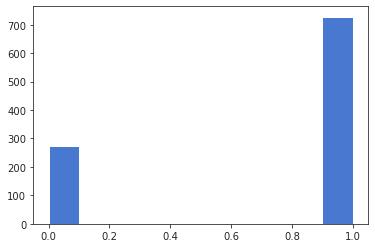

In [14]:
pyplot.hist(bern_samples)


### Binomial distribution

We have just computed the outcome of a number of independent Bernoulli trials. The product of **multiple Bernoulli trials is a Binomial distribution**. For example, if we perform a number of Bernoulli trials ($\{success, fail \}$) on a sample (with replacement) of a population the number of successes will be a binomial distribution. 

The probability of $N$ Bernoulli trials with probability of positive outcome $p$ is written as:

$$P(x\ |\ N, p) = \binom{N}{x} p^x(1 - p)^{(N-x)}$$

Notice that the product includes the term $\binom{N}{x}$ since we must account for all possible combinations of outcomes from the trials. 

The mean and variance are just the Bernoulli mean and variance multiplied by the number or trials:

\begin{align}
Mean &= n p\\
Variance &= n p(1-p)
\end{align}


Let's try computing several Binomial distributions, with probability of success $p = 0.75$, and $N = \{5, 25, 75 \}$. The code in the cell below computes $1000$ realizations of the Binomial distribution for each value of $N$. The theoretical and sample means and variances are computed and printed for each case. Execute this code and examine the results. Are the sample means and variances close to the theoretical values?

In [15]:
# Binomial sampling
trials = numpy.array([5, 25, 75])
binom_samples = [numpy.random.binomial(t, p, n) for t in trials]

binom_sample_means = [samples.mean() for samples in binom_samples]
binom_means = trials * p
pandas.DataFrame({
    'Trials': trials,
    'BinomialMean': binom_means,
    'SampleMean': binom_sample_means,
})

,Trials,BinomialMean,SampleMean
0,5,3.75,3.773
1,25,18.75,18.725
2,75,56.25,56.077


Again, the theoretical mean and sample mean are quite similar for each sample size.  

Execute the code in the cells below to compute and display the theoretical and empirical variance for the samples.   

In [16]:
binom_sample_vars = [samples.var() for samples in binom_samples]
binom_vars = trials * p * (1 - p)
pandas.DataFrame({
    'Trials': trials,
    'BinomialVariance': binom_vars,
    'SampleVariance': binom_sample_vars
})

,Trials,BinomialVariance,SampleVariance
0,5,0.9375,0.971471
1,25,4.6875,4.729375
2,75,14.0625,14.535071


**Your turn:** In the cell below, create and execute the coded to plot the simple histograms of the three Binomial distributions in the `binom_samples` list. Do these distributions appear as you expect? 

(array([  5.,  10.,  15., 127., 109., 166., 348., 130.,  64.,  26.]),
 array([11. , 12.3, 13.6, 14.9, 16.2, 17.5, 18.8, 20.1, 21.4, 22.7, 24. ]),
 <a list of 10 Patch objects>)

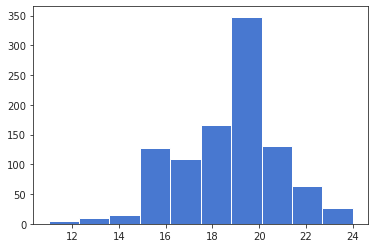

In [22]:
pyplot.hist(binom_samples[1])

Notice that while the outcome of each Bernoulli trial is a discrete binary result, the product of multiple trials can take many discrete values. In fact, as $N$ becomes large the Binomial distribution starts to look like a continuous distribution. In fact, the Binomial distribution converges to the continuous Normal distribution as $N \rightarrow \infty$. 

The code in the cell below computes the histogram of of the Binomial distribution and then the density of the equivelent Normal distribution. This done for the three sets of mean and variance previously computed with probability of success $p = 0.75$, and $N = \{5, 25, 75 \}$. Execute this code and examine the results. How does the Binomial distributon converge to the Normal distribution as $N$ increases?

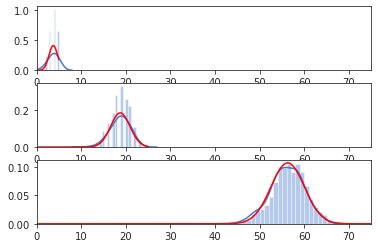

In [23]:
for i in range(len(trials)):
    pyplot.subplot(len(trials), 1, i+1) # Create one plot per row (one for each trial)
    resolution = 1000  # How many points to sample from the PDF of the normal distribution
    x_norm = numpy.linspace(0, trials[i], resolution)
    y_norm = scipy.stats.norm.pdf(
        x_norm, # Where we want to evaluate the PDF
        loc=binom_means[i], # The mean of the distribution
        scale=numpy.sqrt(binom_vars[i])) # The std deviation of the distribution

    # Plot the samples
    sns.distplot(binom_samples[i], kde_kws={'bw':1.0})
    # Plot the normal distribution PDF
    pyplot.plot(x_norm, y_norm, color='red')
    pyplot.xlim(0, trials[-1])

### Poisson distribution

A common problem is modeling the counts of events occurring within a period of time. The Poisson distribution models the occurrence of events in a fixed interval of time. We say that the Poisson distribution models the probability, $P$, of x **arrivals** within the time period. 

In mathematical terms we write the Poisson distribution in terms of the average arrival rate, $\lambda$ as:

$$ 
P(x\ |\ \lambda) = \frac{\lambda^x}{x!} \exp^{-\lambda}
$$

The mean and variance of the Poisson distribution are both equal to the parameter $\lambda$, or:

\begin{align}
Mean = \lambda\\
Variance = \lambda
\end{align}



The code in the cell below computes $1000$ realizations of Poisson distributions with average arrival rates, $\lambda = \{ 1, 5, 25, 100\}$. The sample mean and variance for each distribution is then computed and printed along with the theoretical values. Execute this code and examine the results. Do the theoretical values agree with the sample estimates? 

In [24]:
lambdas = [1, 5, 25, 100]
poisson_samples = [numpy.random.poisson(l, n) for l in lambdas]

poisson_sample_means = [samples.mean() for samples in poisson_samples]
poisson_sample_vars = [samples.var() for samples in poisson_samples]

pandas.DataFrame({
    'PoissonMean': lambdas,
    'SampleMean': poisson_sample_means,
    'SampleVar': poisson_sample_vars,
})

,PoissonMean,SampleMean,SampleVar
0,1,0.989,1.022879
1,5,5.036,4.946704
2,25,25.052,26.289296
3,100,99.390,100.285900


As with the Binomial distribution, you can see that as $\lambda$ the discrete Poisson distribution approaches continuous Normal distribution. The code in the cell below plots histograms of the Poisson distribution along with the density of the equivalent Normal distributions. 

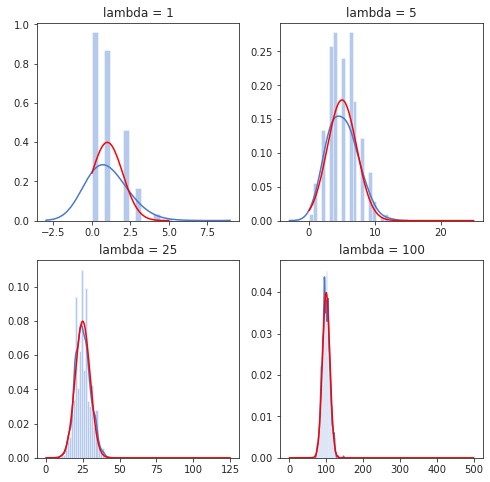

In [25]:
nrows = 2
pyplot.figure(figsize=(8, 8))

for i in range(len(lambdas)):
    pyplot.subplot(len(lambdas) / nrows, nrows, i+1, 
                   title='lambda = %d' % lambdas[i])

    x_norm = numpy.linspace(0, 5*lambdas[i], resolution)
    y_norm = scipy.stats.norm.pdf(
        x_norm, # Where we want to evaluate the PDF
        loc=lambdas[i], # The mean of the distribution
        scale=numpy.sqrt(lambdas[i])) # The std deviation of the distribution

    # Plot the samples
    sns.distplot(poisson_samples[i], kde_kws={'bw':1.0})
    # Plot the normal distribution PDF
    pyplot.plot(x_norm, y_norm, color='red')

## Continuous Distributions

Continuous distributions are used to model variables with continuous valued random variables. Physical measurements, such as weight, length and temperature, are examples of variables with continuous variables. 

Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. We therefore call the distribution function the **Probability Density Function**. This is in contrast to the probability mass function for discrete distributions. 

Properties of continuous probability density functions are:

- The area under the distribution curve must be equal to 1, integrated over the range of possible values:   

$$\int_{-\infty}^{\infty} P(x) dx = 1$$    

- The probability of a range of values of an event equals the **area** under density curve over that range of values, $\{X_1, X_2\}$ is:    

$$P({X_1, X_2}) = \int_{X_1}^{X_2} P(x) dx $$

- Probabilities must be bounded by 0 and 1:

$$0 \le \int_{X_1}^{X_2} P(x) dx \le 1$$

- The probability of any single, exact value, is 0:

$$\int_{X_1}^{X_1} P(x) dx = 0$$ 

### Uniform distribution

A Uniform distribution has flat probability between limits $\{ a, b \}$ and $0$ outside that interval. The Uniform distribution is used in a number of applications, including random selection of data and in simulation. Further, transformations of the Uniform distribution are typically used to generate realizations of other distributions. 

We can write the probability of the the Uniform distribution as:

$$
P(x\ | \{a,b \}) = \Bigg\{ 
\begin{matrix}
\frac{1}{(b - a)}\ if\ a \le x \le b\\
0\ if\ x \lt a\ or\ x\ \gt b
\end{matrix}
$$

The Uniform distribution has the following 

\begin{align}
Mean &= \frac{(a + b)}{2}\\
Variance &= \frac{1}{2}(b - a)^2
\end{align}

The code in the cell below computes and plots the uniform distribution on the interval $\{ 0, 1 \}$, along with the kernel density plot. Execute this code and  examine the result. 

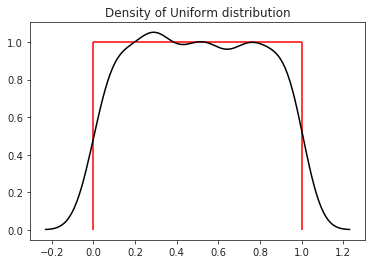

In [26]:
numpy.random.seed(876)
uniform_samples = numpy.random.uniform(0, 1, n)

# Plot the distribution of samples
seaborn.kdeplot(uniform_samples, color='black')

# Draw the uniform PDF
pyplot.vlines(0, 0, 1, colors='red')
pyplot.hlines(1, 0, 1, colors='red')
pyplot.vlines(1, 0, 1, colors='red')
_ = pyplot.title('Density of Uniform distribution')

Let's try simulating some Uniform distributions. The code in the cell below creates and plots the histogram Uniform distributions with $\{100, 1000, 10000, 100000\}$ realizations, along with the theoretical density. Execute this code and examine the results. Notice how close each histogram is to the theoretical density. 

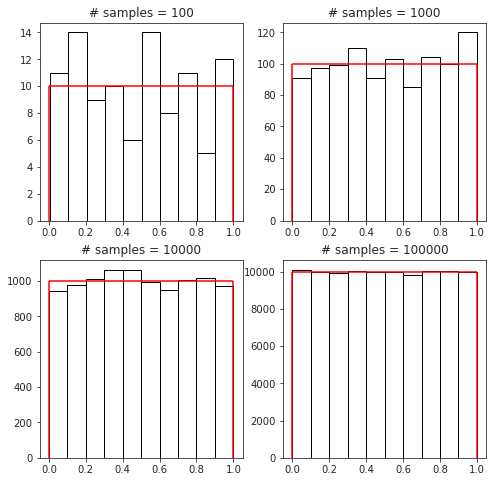

In [27]:
trials = [100, 1000, 10000, 100000]

nrows = 2
pyplot.figure(figsize=(8, 8))
nbins = 10  # how many bins to use for each histogram
for i in range(len(trials)):
  pyplot.subplot(
      len(trials) / nrows, nrows, i+1, 
      title='# samples = %d' % trials[i]) 

  h = trials[i] / nbins
  pyplot.vlines(0, 0, h, colors='red')
  pyplot.hlines(h, 0, 1, colors='red')
  pyplot.vlines(1, 0, h, colors='red')  
  
  # Plot the samples
  pyplot.hist(numpy.random.uniform(0, 1, trials[i]), 
              bins=nbins, color='white', edgecolor='black')


### Normal distribution

The Normal distribution is one of the most widely used probability distributions. Any case where values are the result of product of a large number of processes will converge to a Normal distribution. Many physical processes produce measurement values which are well modeled by a Normal distribution or Log-Normal distribution.

For a Normal distribution we can write the density function as:

$$P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\frac{-(x - \mu)^2}{2 \sigma^2}}$$

The parameters can be interpreted as:

\begin{align}   
\mu &= location\ parameter = mean \\
\sigma &= scale = standard\ deviation \\
\sigma^2 &= Variance 
\end{align}


In other words, the location parameter sets the center of the distribution. The scale determines spread or width of the distribution.

  

The code in the cell below computes and plots the Normal distribution for four different combinations of location and scale, as shown in the table:

| $\mu$ | $\sigma$ |
|:-----:|:-------:|
| 0     | 1       |
| 5     | 1       |
| 0     | 0.1     |
| 4     | 4       |

Execute this code and examine the results. Notice how the center of the distribution changes with the location and the width of the distribution changes with the scale.  

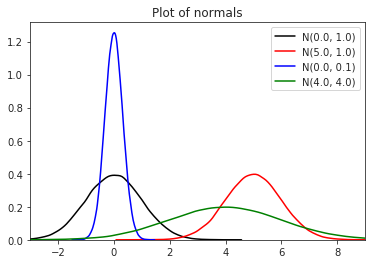

In [28]:
n = 100000

norm_params = [
    # (mean, var)
    (0, 1),
    (5, 1),
    (0, .1),
    (4, 4)
]

norm_samples = [numpy.random.normal(mean, numpy.sqrt(var), n)
                for mean, var in norm_params]

pyplot.title('Plot of normals')
colors = ('black', 'red', 'blue', 'green')
for i, samples in enumerate(norm_samples):
  seaborn.kdeplot(samples, color=colors[i], 
                  label='N(%.1f, %.1f)' % norm_params[i])
pyplot.xlim(-3, 9)
_ = pyplot.legend()

We have now explored the basic properties of the Normal distribution. The relationship between the the quantiles and the number of standard deviations, $\sigma$, to the left or right of center is another important property of the Normal distribution. An understanding of this relationship provides some intuition about the likelihood of events under the Normal distribution.

The code in the cell below plots a histogram of 100000 realizations of a **standard Normal distribution** ($\mu = 0.0,\ \sigma = 1$). Vertical lines are plotted at $\sigma = \{-3, -2, -1,\ 0,\ 1,\ 2,\ 3\}$. Execute this code and examine the results. Notice that events become quite unlikely as $\sigma$ becomes large.

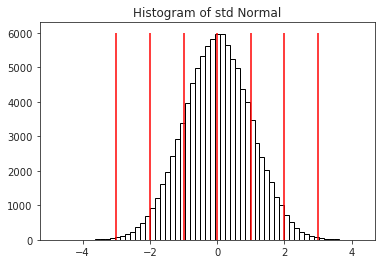

In [29]:
n = 100000

std_norm_samples = numpy.random.standard_normal(n)

pyplot.title('Histogram of std Normal')
pyplot.hist(std_norm_samples, bins=61, color='white', edgecolor='black')
# Draw lines at each standard deviation from the mean
pyplot.vlines(range(-3, 4), 0, 6000, color='red')

What are **cumulative probability** at each of the points showing in the above chart? The code in the cell below uses the [scipy.stats.norm.cdf](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html) function to compute these probabilities. Execute this code and examine the results.  

In [30]:
std_thresholds = range(-3, 4)
quantiles = scipy.stats.norm.cdf(std_thresholds, scale=1, loc=0)
pandas.DataFrame({
    'std deviations': std_thresholds,
    'quantile': quantiles,
})

,std deviations,quantile
0,-3,0.001350
1,-2,0.022750
2,-1,0.158655
3,0,0.500000
4,1,0.841345
5,2,0.977250
6,3,0.998650


The probability of an event occurring outside the range of $+/- 3$ standard deviations is less than 0.3%. And the probability of an event outside the range of $+/- 2$ standard deviations is about 5%. 



The density function of the Normal distribution has the famous **bell-shaped curve**. But, how does this shape arise as the number of samples increases? Execute the code in the cell below to find out.

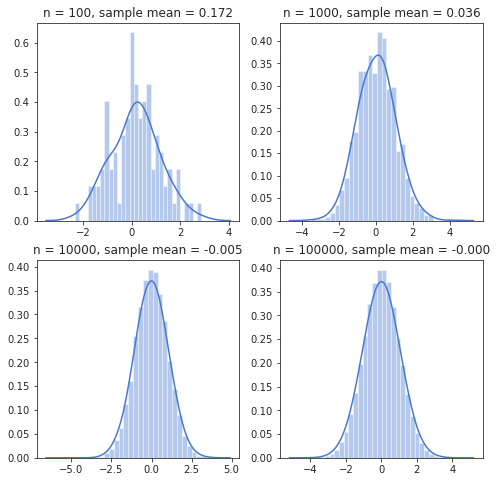

In [31]:
pyplot.figure(figsize=(8, 8))

for i, n in enumerate([100, 1000, 10000, 100000]):
    std_norm_samples = numpy.random.standard_normal(n)
    title = 'n = %d, sample mean = %.3f' % (n, std_norm_samples.mean())
    pyplot.subplot(2, 2, i+1, title=title) 
    sns.distplot(std_norm_samples, bins=30, kde_kws={'bw':0.4})

The lesson here is that for smaller samples events generated by a Normal distribution process can appear to deviate significantly from the ideal density curve. 

### Log-Normal distribution

The Normal distribution is defined for continuous random variables in the range $-\infty \le x \le \infty$. However, many quantities are only defined in a range $0 \lt x \le \infty$. Examples include, price, weight, length, and volume. In many of these cases the **Log-Normal** distribution is a good choice for the data generating process.  

The Log-Normal distribution is based on a log-transformation of the random variable. The probability density function is:  

$$P(x) = \frac{1}{x} \frac{1}{\sigma \sqrt{2 \pi}} \exp{\frac{-(log(x) - \mu)^2}{2 \sigma^2}}$$

The code in the cell below computes and plots 100,000 realizations of a standard Log-Normal distribution using the [scipy.stats.lognorm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html) function. The standard Log-Normal distribution has location = 0 and scale = 1. Execute the code in the cell below and examine the result.       

Text(0.5, 1.0, 'Density of std Log-Normal')

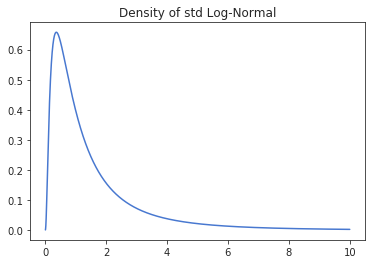

In [32]:
x = numpy.linspace(.01, 10, num=100000)
log_normal_pdf = scipy.stats.lognorm.pdf(x, 1)
pyplot.plot(x, log_normal_pdf)
pyplot.title('Density of std Log-Normal')

**Your turn:** The Log-Normal distribution is on log scale. You can transform the Log-Normal distribution to a Normal distribution. In the cell below create and excute the code to natural log transform the x variable and plot the density. How does this result compair to a standard Normal distribution.      

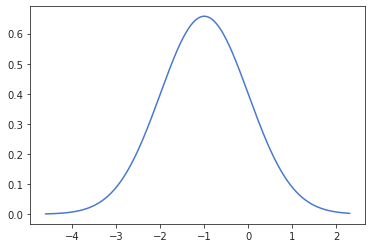

In [39]:
import numpy as np

pyplot.plot(np.log(x), log_normal_pdf)

### Student t-distribution

The [Student t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution), often just referred to as the t-distribution. This distribution is of importance in statistics since the difference of the means of two Normally distributed random variables is t-distributed. This property makes the t-distribution important in hypothesis testing.  

The t-distribution is defined in a somewhat different way from the other distributions we have looked at. It has one parameter, the **degrees of freedom**, denoted as $\nu$. The derivation of the density function for the t-distribution is a bit complicated and leads to the following, rather complex result:

$$
P(x\ |\ \nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu \pi} \Gamma(\frac{\nu}{2})} \bigg(1 + \frac{x^2}{\nu} \bigg)^{- \frac{\nu + 1}{2}}\\
where\\
\Gamma(x) = Gamma\ function
$$

Despite the complex density formula, you can gain a fair feel for the behavior of the t-distribution by plotting it for several values of the degrees of freedom, $\nu$, and comparing it to the Normal distribution. The code in the cell below plots the density function for the t-distribution for degrees of freedom, $\nu = \{1, 2, 3, \infty \}$, along with a standard Normal distribution. Execute this code and examine the results. Notice how the t-distribution is wider with heavier tails than the Normal distribution for low degrees of freedom. As $\nu \rightarrow \infty$ the t-distribution becomes identical to the Normal distribution. 

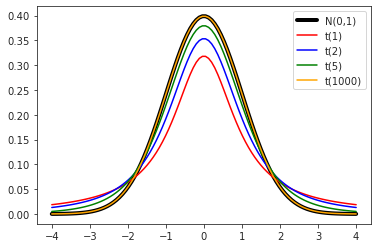

In [40]:
x = numpy.linspace(-4, 4, num=100)

# Plot the normal distribution PDF
pyplot.plot(x, scipy.stats.norm.pdf(x), color='black', linewidth=4, label='N(0,1)')

for df, color in zip([1, 2, 5, 1000], ['red', 'blue', 'green', 'orange']):  
  pyplot.plot(x, scipy.stats.t.pdf(x, df), label='t(%d)' % df, color=color)
_ = pyplot.legend()

### Gamma and Exponential distributions

The Gamma distributions are a complex family of continuous probability distributions. All distributions in the Gamma family are only defined for $0 \ge x \ge \infty$.

We will look at one special cases of particular interest, the **exponential distribution**. The Exponential distribution is used to model waiting times between events and events where the probability density decays with time. We can write the probability density function of the Exponential distribution as:

$$P(x; \lambda) = \bigg\{ 
\begin{matrix}
\lambda \exp^{- \lambda x}\ if\ x \ge 0\\
0\ if\ x \lt 0
\end{matrix}\\
\\
where\\
Average\ arrival\ rate\ = Expected\ value\ = E[X] = \frac{1}{\lambda}\\
Var[X] = \frac{1}{\lambda^2}
$$

Notice also that:

$$average\ time\ between\ events = \lambda = \frac{1}{average\ arrival\ rate}$$


To get a feel for the Exponential distribution, let's plot it for arrival rates of $\{0.5, 1.0, 2.0  \}$ or $\lambda = \{ 2.0, 1.0, 0.5 \}$. Execute the code in the cell below to create the plot. Notice how the density function changes with $\lambda$.

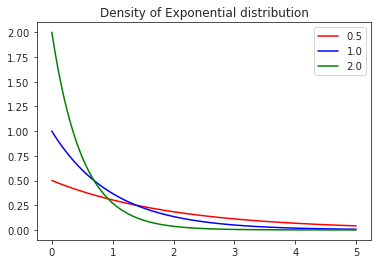

In [41]:
x = numpy.linspace(0, 5, num=100)
lambdas = [.5, 1., 2.]
colors = ['red', 'blue', 'green']

for i in range(len(lambdas)):
  pyplot.plot(x, scipy.stats.expon.pdf(
      x, loc=0, scale=1/lambdas[i]), color=colors[i], label=lambdas[i])
  
pyplot.legend()
_ = pyplot.title('Density of Exponential distribution')

## Exponential Distributions

You may have noticed that several of the distributions we have discussed use exponential functions to compute the probabilities. We call this family of probability distributions the **exponential family**.   

Exponential family distributions have tractable mathematical properties. Understanding of one distribution helps understand the others.   

Further, exponential distributions are widely useful. They show up in physical problems as well as many data problems.  

## Summary

In this notebook you have explored the properties of certain discrete and continuous probability distributions. We can summmarize the properties of these distributions as follows:

1. Discrete distributions
 - Discrete distributions are used to model the probability of events with discrete outcomes or states. 
 - We call the distribution function the **Probability Mass Function**.
 - The sum of the probabilities of all possible events must equal 1.
 - The probability of an event is equal to the value of the distribution at that point.
 - All probabilities are strictly in the range 0-1.
2. Continuous distributions
 - Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. 
 - We call the distribution function the **Probability Density Function**. 
 - The probability of a range of values of an event equals the **area** under density curve over that range of values.
 - Probabilities cannot have negative values.
 - The probability of any single, exact value, is 0.

#### Copyright 2019, 2020, Stephen F Elston. All rights reserved. 